In [1]:
#importing the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from collections import Counter
import scipy.stats as stats

In [2]:
#reading the original dataset 
df1 = pd.read_csv('Life Expectancy Data.csv')
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#reading all the columns of the dataset
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
#describing the original dataset 
df1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
#checking for null cells in the original dataset
df1.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### There  are empty cells in the given dataset so we drop the empty cells

In [6]:
#Dropping null cells and renamin some rows in the dataset to generate new dataset from the original one
df2 = df1.dropna()
old_colnames=df2.columns
new_colnames=['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Expenditure%', 'Hepatitis_B', 'Measles', 'BMI', 'Under five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years ', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
df2=df2.rename(columns=dict(zip(old_colnames,new_colnames))).round(1)
df2

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Expenditure%,Hepatitis_B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.3,65.0,1154,...,6.0,8.2,65.0,0.1,584.3,33736494.0,17.2,17.3,0.5,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.0,73.5,62.0,492,...,58.0,8.2,62.0,0.1,612.7,327582.0,17.5,17.5,0.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.0,73.2,64.0,430,...,62.0,8.1,64.0,0.1,631.7,31731688.0,17.7,17.7,0.5,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.0,78.2,67.0,2787,...,67.0,8.5,67.0,0.1,670.0,3696958.0,17.9,18.0,0.5,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.0,7.1,68.0,3013,...,68.0,7.9,68.0,0.1,63.5,2978599.0,18.2,18.2,0.5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.4,0.0,68.0,31,...,67.0,7.1,65.0,33.6,454.4,12777511.0,9.4,9.4,0.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.1,0.0,7.0,998,...,7.0,6.5,68.0,36.7,453.4,12633897.0,9.8,9.9,0.4,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.4,0.0,73.0,304,...,73.0,6.5,71.0,39.8,57.3,125525.0,1.2,1.3,0.4,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.7,0.0,76.0,529,...,76.0,6.2,75.0,42.1,548.6,12366165.0,1.6,1.7,0.4,9.8


In [7]:
#printing the first five rows of the dataset
df2.head(5)

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Expenditure%,Hepatitis_B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.3,65.0,1154,...,6.0,8.2,65.0,0.1,584.3,33736494.0,17.2,17.3,0.5,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.0,73.5,62.0,492,...,58.0,8.2,62.0,0.1,612.7,327582.0,17.5,17.5,0.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.0,73.2,64.0,430,...,62.0,8.1,64.0,0.1,631.7,31731688.0,17.7,17.7,0.5,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.0,78.2,67.0,2787,...,67.0,8.5,67.0,0.1,670.0,3696958.0,17.9,18.0,0.5,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.0,7.1,68.0,3013,...,68.0,7.9,68.0,0.1,63.5,2978599.0,18.2,18.2,0.5,9.5


In [8]:
#printing the last five rows of the new dataset
df2.tail()

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Expenditure%,Hepatitis_B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.4,0.0,68.0,31,...,67.0,7.1,65.0,33.6,454.4,12777511.0,9.4,9.4,0.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.1,0.0,7.0,998,...,7.0,6.5,68.0,36.7,453.4,12633897.0,9.8,9.9,0.4,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.4,0.0,73.0,304,...,73.0,6.5,71.0,39.8,57.3,125525.0,1.2,1.3,0.4,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.7,0.0,76.0,529,...,76.0,6.2,75.0,42.1,548.6,12366165.0,1.6,1.7,0.4,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.7,0.0,79.0,1483,...,78.0,7.1,78.0,43.5,547.4,12222251.0,11.0,11.2,0.4,9.8


In [9]:
#descriptive statistics of the new dataset
df2.describe()

,Year,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Expenditure%,Hepatitis_B,Measles,BMI,Under five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.532383,698.973620,79.217708,2224.494239,38.128623,44.220133,83.564585,5.956701,84.155246,1.983869,5566.032505,1.465363e+07,4.850637,4.907762,0.631837,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.030035,1759.230298,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299291,21.579193,6.032360,11475.899264,7.046039e+07,4.599228,4.653757,0.184698,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.700000,2.000000,0.100000,1.700000,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.800000,37.400000,74.000000,0.000000,19.500000,1.000000,81.000000,4.400000,82.000000,0.100000,462.100000,1.918970e+05,1.600000,1.700000,0.500000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.800000,145.100000,89.000000,15.000000,43.700000,4.000000,93.000000,5.800000,92.000000,0.100000,1592.600000,1.419631e+06,3.000000,3.200000,0.700000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.300000,509.400000,96.000000,373.000000,55.800000,29.000000,97.000000,7.500000,97.000000,0.700000,4718.500000,7.658972e+06,7.100000,7.100000,0.800000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.900000,18961.300000,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.400000,99.000000,50.600000,119172.700000,1.293859e+09,27.200000,28.200000,0.900000,20.700000


In [10]:
#highest populations over the years
df2[['Country', 'Year','Population']].head()

,Country,Year,Population
0,Afghanistan,2015,33736494.0
1,Afghanistan,2014,327582.0
2,Afghanistan,2013,31731688.0
3,Afghanistan,2012,3696958.0
4,Afghanistan,2011,2978599.0


In [11]:
#lowest populations over the years
df2[['Country','Year', 'Population']].tail()

,Country,Year,Population
2933,Zimbabwe,2004,12777511.0
2934,Zimbabwe,2003,12633897.0
2935,Zimbabwe,2002,125525.0
2936,Zimbabwe,2001,12366165.0
2937,Zimbabwe,2000,12222251.0


### The countries with the highest and the lowest average life expectancies over the years

In [12]:
#1 countries with average life expectancy rates
group_country_life_exp = df2.groupby(['Country'])['Life_Expectancy'].mean().round(2).sort_values(ascending=False)
group_country_life_exp

Country
Ireland         83.44
Canada          82.23
France          82.21
Italy           82.15
Spain           82.02
                ...  
Angola          50.68
Malawi          50.26
Zimbabwe        49.39
Lesotho         48.61
Sierra Leone    48.42
Name: Life_Expectancy, Length: 133, dtype: float64

In [13]:
#2 The top 7 countries with the highest average life expectancy rates
group_country_life_exp.head()

Country
Ireland    83.44
Canada     82.23
France     82.21
Italy      82.15
Spain      82.02
Name: Life_Expectancy, dtype: float64

In [14]:
#1 The bottom 7 countries with the highest average life expectancy rates
group_country_life_exp.tail()

Country
Angola          50.68
Malawi          50.26
Zimbabwe        49.39
Lesotho         48.61
Sierra Leone    48.42
Name: Life_Expectancy, dtype: float64

### Total GDP of each country recorded over the years

In [15]:
# sum of GDP
group_country_GDP = df2.groupby(['Country'])['GDP'].sum().round(2).sort_values(ascending=False)
group_country_GDP

Country
Luxembourg           850912.3
Austria              497573.6
Australia            495476.6
France               386921.8
Canada               354827.1
                       ...   
Sierra Leone           2002.5
Niger                  1916.3
Burundi                1666.3
Equatorial Guinea       192.6
Haiti                   164.4
Name: GDP, Length: 133, dtype: float64

In [16]:
# Top seven countries with the highest sum of  GDP
group_country_GDP.head()

Country
Luxembourg    850912.3
Austria       497573.6
Australia     495476.6
France        386921.8
Canada        354827.1
Name: GDP, dtype: float64

In [17]:
#Bottom seven countries with the highest sum of  GDP
group_country_GDP.tail()

Country
Sierra Leone         2002.5
Niger                1916.3
Burundi              1666.3
Equatorial Guinea     192.6
Haiti                 164.4
Name: GDP, dtype: float64

###  Total number of  deaths of each countries over the years

In [56]:
#Adult Mortality of the countries
Adult_Mort = df2.groupby(['Country'])['Adult Mortality'].sum().round(2).sort_values(ascending=False)
Adult_Mort

Country
Zimbabwe             7062.0
Botswana             6914.0
Lesotho              6566.0
South Africa         6276.0
Malawi               5239.0
                      ...  
Tunisia               299.0
Ireland               277.0
Sweden                226.0
Netherlands           189.0
Equatorial Guinea      32.0
Name: Adult Mortality, Length: 133, dtype: float64

In [57]:
# The first five highest adult mortality over the years
cb=Adult_Mort.head()
cb

Country
Zimbabwe        7062.0
Botswana        6914.0
Lesotho         6566.0
South Africa    6276.0
Malawi          5239.0
Name: Adult Mortality, dtype: float64

In [20]:
#The last five highest adult mortality over the years
Adult_Mort.tail()

Country
Tunisia              299.0
Ireland              277.0
Sweden               226.0
Netherlands          189.0
Equatorial Guinea     32.0
Name: Adult Mortality, dtype: float64

In [54]:
#under five deaths
under_5_deaths = df2.groupby(['Country'])['Under five Deaths'].mean().round(2).sort_values(ascending=False)
under_5_deaths

Country
India              1681.82
Nigeria             825.40
Pakistan            457.58
China               361.13
Ethiopia            240.00
                    ...   
Seychelles            0.00
Belize                0.00
Solomon Islands       0.00
Suriname              0.00
Latvia                0.00
Name: Under five Deaths, Length: 133, dtype: float64

In [55]:
#top 5 countries with the highest under five deaths
under_5_deaths.head()

Country
India       1681.82
Nigeria      825.40
Pakistan     457.58
China        361.13
Ethiopia     240.00
Name: Under five Deaths, dtype: float64

In [23]:
#bottom 5 under five deaths
under_5_deaths.tail(5)

Country
Sao Tome and Principe    0
Seychelles               0
Solomon Islands          0
Ireland                  0
Latvia                   0
Name: Under five Deaths, dtype: int64

### Countries which recorded the most and least sickness on average over the years

In [24]:

disease = df2[['Country', 'HIV/AIDS', 'Hepatitis_B', 'Measles', 'Polio']]
disease

,Country,HIV/AIDS,Hepatitis_B,Measles,Polio
0,Afghanistan,0.1,65.0,1154,6.0
1,Afghanistan,0.1,62.0,492,58.0
2,Afghanistan,0.1,64.0,430,62.0
3,Afghanistan,0.1,67.0,2787,67.0
4,Afghanistan,0.1,68.0,3013,68.0
...,...,...,...,...,...
2933,Zimbabwe,33.6,68.0,31,67.0
2934,Zimbabwe,36.7,7.0,998,7.0
2935,Zimbabwe,39.8,73.0,304,73.0
2936,Zimbabwe,42.1,76.0,529,76.0


In [25]:
c_hiv = df2.groupby(['Country'])['HIV/AIDS'].mean().round(2).sort_values(ascending=False)
c_hiv

Country
Swaziland       34.67
Zimbabwe        24.40
Lesotho         22.06
South Africa    19.49
Botswana        17.48
                ...  
Ireland          0.10
Iraq             0.10
Greece           0.10
Germany          0.10
Latvia           0.10
Name: HIV/AIDS, Length: 133, dtype: float64

In [26]:
# Top five HIV dominated countries
a=c_hiv.head()
a

Country
Swaziland       34.67
Zimbabwe        24.40
Lesotho         22.06
South Africa    19.49
Botswana        17.48
Name: HIV/AIDS, dtype: float64

In [27]:
# Bottom five HIV dominated countries
c_hiv.tail()

Country
Ireland    0.1
Iraq       0.1
Greece     0.1
Germany    0.1
Latvia     0.1
Name: HIV/AIDS, dtype: float64

In [28]:
country_hb = df2.groupby(['Country'])['Hepatitis_B'].sum().round(2).sort_values(ascending=False)
country_hb

Country
Albania              1568.0
Fiji                 1483.0
Seychelles           1481.0
Maldives             1467.0
Israel               1463.0
                      ...  
Sweden                229.0
Chad                  193.0
Netherlands           147.0
Haiti                 116.0
Equatorial Guinea       2.0
Name: Hepatitis_B, Length: 133, dtype: float64

In [29]:
#top five nations with the highest Hepatitis_B 
country_hb.head()

Country
Albania       1568.0
Fiji          1483.0
Seychelles    1481.0
Maldives      1467.0
Israel        1463.0
Name: Hepatitis_B, dtype: float64

In [30]:

country_hb.tail()

Country
Sweden               229.0
Chad                 193.0
Netherlands          147.0
Haiti                116.0
Equatorial Guinea      2.0
Name: Hepatitis_B, dtype: float64

In [31]:
country_measles = df2.groupby(['Country'])['Measles'].sum().round(2).sort_values(ascending=False)
country_measles

Country
China                    1011366
India                     475074
Indonesia                 244820
Nigeria                   218964
Malawi                    120497
                          ...   
Sao Tome and Principe          0
Cabo Verde                     0
Belize                         0
Paraguay                       0
Honduras                       0
Name: Measles, Length: 133, dtype: int64

In [32]:
# Top five Highest recorded number of measles
country_measles.head()

Country
China        1011366
India         475074
Indonesia     244820
Nigeria       218964
Malawi        120497
Name: Measles, dtype: int64

In [33]:
# Five lowest recorded Measles
country_measles.tail()

Country
Sao Tome and Principe    0
Cabo Verde               0
Belize                   0
Paraguay                 0
Honduras                 0
Name: Measles, dtype: int64

In [34]:
Country_Polio = df2.groupby(['Country'])['Polio'].mean().round(2).sort_values(ascending=False)
Country_Polio

Country
Seychelles                  98.60
Uzbekistan                  98.46
Brazil                      98.33
Sri Lanka                   98.33
Thailand                    98.27
                            ...  
Nigeria                     45.60
Ethiopia                    44.25
Central African Republic    42.50
Chad                        31.86
Equatorial Guinea           24.00
Name: Polio, Length: 133, dtype: float64

In [35]:
#highest number of polios recorded
Country_Polio.head()

Country
Seychelles    98.60
Uzbekistan    98.46
Brazil        98.33
Sri Lanka     98.33
Thailand      98.27
Name: Polio, dtype: float64

In [36]:
# Lowest number of polios recorded
Country_Polio.tail()

Country
Nigeria                     45.60
Ethiopia                    44.25
Central African Republic    42.50
Chad                        31.86
Equatorial Guinea           24.00
Name: Polio, dtype: float64

### Checking for relationship between some of the variables in the dataset

In [37]:
# adult mortality and hiv correlation
cor_tion = df2[['Adult Mortality', 'HIV/AIDS']].corr()
cor_tion

,Adult Mortality,HIV/AIDS
Adult Mortality,1.000000,0.550691
HIV/AIDS,0.550691,1.000000


In [38]:
# under five deaths and measles correlation
cor_tion = df2[['Under five Deaths', 'Measles']].corr()
cor_tion

,Under five Deaths,Measles
Under five Deaths,1.000000,0.517506
Measles,0.517506,1.000000


In [39]:
# infant deaths and polio correlation
cor_tion = df2[['Infant Deaths', 'Polio']].corr()
cor_tion

,Infant Deaths,Polio
Infant Deaths,1.000000,-0.156929
Polio,-0.156929,1.000000


## VISUALIZING SOME OF THE OUTCOMES OF THE DATASET

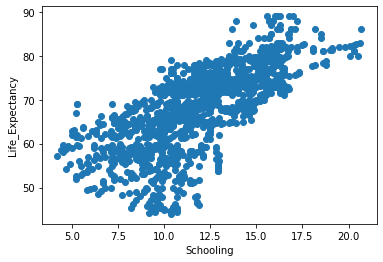

In [40]:
#scatterplot showing relationship between life expectancy and schooling
x = df2.Schooling
y = df2.Life_Expectancy
plt.xlabel("Schooling")
plt.ylabel('Life_Expectancy')
plt.scatter(x, y)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


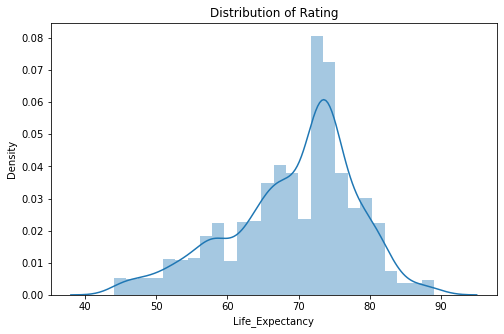

In [41]:
## Looking at distribution of rating

fig, ax = plt.subplots(figsize=[8,5])
sb.distplot(df2['Life_Expectancy'], ax=ax)

#giving a title
ax.set_title('Distribution of Rating')

plt.show()

In [42]:
df2['Life_Expectancy'].mode()

0    73.0
dtype: float64

In [43]:
df2['Life_Expectancy'].mean()

69.30230442692543

In [44]:
df2[['Life_Expectancy','GDP']].corr()

,Life_Expectancy,GDP
Life_Expectancy,1.000000,0.441322
GDP,0.441322,1.000000


In [52]:
b=df2['Life_Expectancy']
b

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 1649, dtype: float64